# SubgraphX on BA-Shapes dataset for 2-layer GCN

!pip install dive-into-graphs

!pip install torch_sparse

pip install torch-sparse==0.6.13 -f https://pytorch-geometric.com/whl/torch-1.10.0+cu113.html

conda install pyg -c pyg

print(torch.__version__)

!pip install torch_geometric

!pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.2.2+cpu.html

!pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-2.2.0+cpu.html

!pip install torch-sparse==0.6.18 -f https://data.pyg.org/whl/torch-2.2.2+cpu.html

!conda install torch_sparse -c pyg

!pip install torch-sparse

!pip install numpy --upgrade

In [1]:
import os
import os.path as osp

import torch
from torch_geometric.data import download_url, extract_zip

from digg.xgraph.dataset import SynGraphDataset,MoleculeDataset
from digg.xgraph.models import *
from digg.xgraph.utils.compatibility import compatible_state_dict

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


### Load dataset

In [2]:
import rdkit

In [4]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.6/27.6 MB 6.7 MB/s eta 0:00:0000:0100:01


In [3]:
# dataset = SynGraphDataset('./datasets', 'BA_shapes')
# dataset = MoleculeDataset('./datasets', 'mutag')
dataset = MoleculeDataset(root='.', name='MUTAG')
dataset.data.x = dataset.data.x.to(torch.float32)
dataset.data.x = dataset.data.x[:, :1]
dim_node = dataset.num_node_features
dim_edge = dataset.num_edge_features
num_classes = dataset.num_classes

/Users/beatrixwen/miniforge3/envs/py_ten/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:301: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


### Load model and checkpoints

In [4]:
# def check_checkpoints(root='./'):
#     if osp.exists(osp.join(root, 'checkpoints')):
#         return
#     url = ('https://github.com/divelab/DIG_storage/raw/main/xgraph/checkpoints.zip')
#     path = download_url(url, root)
#     extract_zip(path, root)
#     os.unlink(path)


model = GCN_2l(model_level='graph', dim_node=dim_node, dim_hidden=6, num_classes=num_classes)
model.to(device)
# check_checkpoints()
# ckpt_path = osp.join('checkpoints', 'ba_shapes', 'GCN_2l', '0', 'GCN_2l_best.ckpt')
# state_dict = compatible_state_dict(torch.load(ckpt_path, map_location='cpu')['state_dict'])
# model.load_state_dict(state_dict)

GCN_2l(
  (conv1): GCNConv(1, 6)
  (convs): ModuleList(
    (0): GCNConv(6, 6)
  )
  (relu1): ReLU()
  (relus): ModuleList(
    (0): ReLU()
  )
  (readout): GlobalMeanPool()
  (ffn): Sequential(
    (0): Linear(in_features=6, out_features=2, bias=True)
  )
  (dropout): Dropout(p=0.5, inplace=False)
)

In [4]:
# from digg.xgraph.models.models import GCNConv,GCN_2l,GNNPool

In [5]:
import torch.nn as nn 

class GNNPool(nn.Module):
    def __init__(self):
        super().__init__()

from digg.xgraph.method import SubgraphX

explainer = SubgraphX(model, num_classes=4, device=device,
                      explain_graph=False, reward_method='nc_mc_l_shapley')

### build max degree model

In [6]:
from torch_geometric.typing import SparseTensor

In [7]:
## Standard libraries
import os
import json
import math
import numpy as np 
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0
# import seaborn as sns
# sns.reset_orig()
# sns.set()

## Progress bar
from tqdm.notebook import tqdm

## PyTorch
import torch
import torch.nn as nn
# import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision.datasets import CIFAR10
from torchvision import transforms
# PyTorch Lightning
try:
    import pytorch_lightning as pl
except ModuleNotFoundError: # Google Colab does not have PyTorch Lightning installed by default. Hence, we do it here if necessary
    !pip install --quiet pytorch-lightning>=1.4
    import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint

# Path to the folder where the datasets are/should be downloaded (e.g. CIFAR10)
DATASET_PATH = "../data"
# Path to the folder where the pretrained models are saved
CHECKPOINT_PATH = "../saved_models/tutorial7"

# Setting the seed
pl.seed_everything(42)

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("mps")
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

/var/folders/y9/hy0mnzl536ng5c4qz99ppmf00000gn/T/ipykernel_18265/2731902037.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export
Seed set to 42


cpu


!pip install seaborn

!pip install torchvision

In [8]:
import torch_geometric.nn as geom_nn
import torch_geometric.data as geom_data
gnn_layer_by_name = {
    "GCN": geom_nn.GCNConv,
    "GAT": geom_nn.GATConv,
    "GIN": geom_nn.GINConv,
    "GraphConv": geom_nn.GraphConv
}

In [7]:
from torch_geometric.utils import to_networkx, from_networkx

In [10]:
class GNNModel(nn.Module):
    
    def __init__(self, c_in, c_hidden, c_out, num_layers=2, layer_name="GraphConv", dp_rate=0.1, **kwargs):
        """
        Inputs:
            c_in - Dimension of input features
            c_hidden - Dimension of hidden features
            c_out - Dimension of the output features. Usually number of classes in classification
            num_layers - Number of "hidden" graph layers
            layer_name - String of the graph layer to use
            dp_rate - Dropout rate to apply throughout the network
            kwargs - Additional arguments for the graph layer (e.g. number of heads for GAT)
        """
        super().__init__()
        gnn_layer = gnn_layer_by_name[layer_name]
        
        layers = []
        in_channels, out_channels = c_in, c_hidden
        for l_idx in range(num_layers-1):
            layers += [
                gnn_layer(in_channels=in_channels, 
                          out_channels=out_channels,
                          **kwargs),
                nn.ReLU(inplace=True)
                # ,nn.Dropout(dp_rate)
            ]
            in_channels = c_hidden
        layers += [gnn_layer(in_channels=in_channels, 
                             out_channels=c_out,
                             **kwargs)]
        self.layers = nn.ModuleList(layers)
    
    def forward(self, x, edge_index):
        """
        Inputs:
            x - Input features per node
            edge_index - List of vertex index pairs representing the edges in the graph (PyTorch geometric notation)
        """
        for l in self.layers:
            # For graph layers, we need to add the "edge_index" tensor as additional input
            # All PyTorch Geometric graph layer inherit the class "MessagePassing", hence
            # we can simply check the class type.
            if isinstance(l, geom_nn.MessagePassing):
                x = l(x, edge_index)
            else:
                x = l(x)
        return x

In [11]:
# Small function for printing the test scores
def print_results(result_dict):
    if "train" in result_dict:
        print(f"Train accuracy: {(100.0*result_dict['train']):4.2f}%")
    if "val" in result_dict:
        print(f"Val accuracy:   {(100.0*result_dict['val']):4.2f}%")
    print(f"Test accuracy:  {(100.0*result_dict['test']):4.2f}%")

In [8]:
import torch_geometric

In [13]:
tu_dataset = torch_geometric.datasets.TUDataset(root=DATASET_PATH, name="ENZYMES")

In [14]:
print("Data object:", tu_dataset.data)
print("Length:", len(tu_dataset))
print(f"Average label: {tu_dataset.data.y.float().mean().item():4.2f}")

Data object: Data(x=[19580, 3], edge_index=[2, 74564], y=[600])
Length: 600
Average label: 2.50


/Users/beatrixwen/miniforge3/envs/tensorflow/lib/python3.9/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [15]:
tu2=tu_dataset.copy()
type(tu2.data)
for i in range(len(tu2.y)): 
    tu2.y[i]=max(torch.bincount(tu2[i].edge_index[0,:]))
    # tu2.y[i]=sum(torch.bincount(tu2[i].edge_index[0,:]))
    thres=6
tu2.data.y=(tu2.y>thres).long()
# torch.manual_seed(42)
# tu_dataset.shuffle()
# train_dataset = tu_dataset[:500]
# test_dataset = tu_dataset[500:]
torch.manual_seed(42)
tu2_shuffle=tu2.shuffle()
train_dataset = tu2_shuffle[:500]
test_dataset = tu2_shuffle[500:]

/Users/beatrixwen/miniforge3/envs/tensorflow/lib/python3.9/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. The data of the dataset is already cached, so any modifications to `data` will not be reflected when accessing its elements. Clearing the cache now by removing all elements in `dataset._data_list`. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [16]:
graph_train_loader = geom_data.DataLoader(train_dataset, batch_size=15, shuffle=True)
graph_val_loader = geom_data.DataLoader(test_dataset, batch_size=15) # Additional loader if you want to change to a larger dataset
graph_test_loader = geom_data.DataLoader(test_dataset, batch_size=15)

/Users/beatrixwen/miniforge3/envs/tensorflow/lib/python3.9/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


batch = next(iter(graph_test_loader))
print("Batch:", batch)
print("Labels:", batch.y[:10])
print("Batch indices:", batch.batch[:40])

In [17]:
class GraphGNNModel(nn.Module):
    
    def __init__(self, c_in, c_hidden, c_out, dp_rate_linear=0.5, **kwargs):
        """
        Inputs:
            c_in - Dimension of input features
            c_hidden - Dimension of hidden features
            c_out - Dimension of output features (usually number of classes)
            dp_rate_linear - Dropout rate before the linear layer (usually much higher than inside the GNN)
            kwargs - Additional arguments for the GNNModel object
        """
        super().__init__()
        self.GNN = GNNModel(c_in=c_in, 
                            c_hidden=c_hidden, 
                            c_out=c_hidden, # Not our prediction output yet!
                            **kwargs)
        self.head = nn.Sequential(
            # nn.Dropout(dp_rate_linear),
            nn.Linear(c_hidden, c_out)
        )

    def forward(self, x, edge_index, batch_idx):
        """
        Inputs:
            x - Input features per node
            edge_index - List of vertex index pairs representing the edges in the graph (PyTorch geometric notation)
            batch_idx - Index of batch element for each node
        """
        x = self.GNN(x, edge_index)
        # x = geom_nn.global_mean_pool(x, batch_idx) # Average pooling
        x = geom_nn.global_max_pool(x, batch_idx) # Average pooling
        # x = geom_nn.global_add_pool(x, batch_idx) # sum pooling
        x = self.head(x)
        return x

In [49]:
class GraphLevelGNN(pl.LightningModule):

    def __init__(self, **model_kwargs):
        super().__init__()
        # Saving hyperparameters
        self.save_hyperparameters()
        
        self.model = GraphGNNModel(**model_kwargs)
        self.loss_module = nn.BCEWithLogitsLoss() if self.hparams.c_out == 1 else nn.CrossEntropyLoss()

    def forward(self, data, mode="train"):
        x, edge_index, batch_idx = data.x, data.edge_index, data.batch
        x = self.model(x, edge_index, batch_idx)
        x = x.squeeze(dim=-1)
        
        if self.hparams.c_out == 1:
            preds = (x > 0).float()
            try: 
                data.y = data.y.float()
            except: pass
        else:
            preds = x.argmax(dim=-1)
        try: 
            loss = self.loss_module(x, data.y)
            acc = (preds == data.y).sum().float() / preds.shape[0]
        except:
            loss = 0
            acc = 0

        return loss,acc,preds


    def configure_optimizers(self):
        optimizer = optim.AdamW(self.parameters(), lr=1e-2, weight_decay=0.0) # High lr because of small dataset and small model
        return optimizer

    def training_step(self, batch, batch_idx):
        loss, acc,_ = self.forward(batch, mode="train")
        self.log('train_loss', loss)
        self.log('train_acc', acc)
        return loss

    # def validation_step(self, batch, batch_idx):
    #     _, acc,preds = self.forward(batch, mode="val")
    #     self.log('val_acc', acc)
    #     # self.log('val_pred', preds)

    def test_step(self, batch, batch_idx):
        _, acc,_ = self.forward(batch, mode="test")
        self.log('test_acc', acc)
        # self.log('test_pred', pred_y)

In [19]:
def train_graph_classifier(model_name,train_loader=graph_train_loader,test_loader=graph_test_loader, **model_kwargs):
    pl.seed_everything(42)
    
    # Create a PyTorch Lightning trainer with the generation callback
    root_dir = os.path.join(CHECKPOINT_PATH, "GraphLevel" + model_name)
    os.makedirs(root_dir, exist_ok=True)
    trainer = pl.Trainer(default_root_dir=root_dir,
                         # callbacks=[ModelCheckpoint(save_weights_only=True, mode="max", monitor="val_acc")],
                         accelerator="cpu",# if str(device).startswith("cuda") else "cpu",
                         devices=1,
                         max_epochs=500,
                         enable_progress_bar=False)
    trainer.logger._default_hp_metric = None # Optional logging argument that we don't need

    # Check whether pretrained model exists. If yes, load it and skip training
    pretrained_filename = os.path.join(CHECKPOINT_PATH, f"GraphLevel{model_name}.ckpt")
    if os.path.isfile(pretrained_filename):
        # print("Found pretrained model, loading...")
        # model = GraphLevelGNN.load_from_checkpoint(pretrained_filename)
        pl.seed_everything(42)
        model = GraphLevelGNN(c_in=tu2.num_node_features, 
                              c_out=1 if tu2.num_classes==2 else tu2.num_classes, 
                              **model_kwargs)
        trainer.fit(model, graph_train_loader, graph_val_loader)
        # model = GraphLevelGNN.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
    else:
        pl.seed_everything(42)
        model = GraphLevelGNN(c_in=tu2.num_node_features, 
                              c_out=1 if tu2.num_classes==2 else tu2.num_classes, 
                              **model_kwargs)
        trainer.fit(model, graph_train_loader, graph_val_loader)
        # model = GraphLevelGNN.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
    # Test best model on validation and test set
    train_result = trainer.test(model, train_loader, verbose=False)
    test_result = trainer.test(model, test_loader, verbose=False)
    # test_pred = trainer.predict(model, graph_test_loader, return_predictions=True)
    result = {"test": test_result[0]['test_acc'], "train": train_result[0]['test_acc']
              # ,"pred_y": test_pred
            } 
    return model, result

In [20]:
model, result = train_graph_classifier(model_name="GraphConv", 
                                       c_hidden=16, 
                                       layer_name="GraphConv", 
                                       num_layers=3, 
                                       dp_rate_linear=0,
                                       dp_rate=0.0)

Seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/beatrixwen/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Seed set to 42
/Users/beatrixwen/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:72: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.

  | Name        | Type              | Params
--------------------------------------------------
0 | model       | GraphGNNModel     | 1.2 K 
1 | loss_module | BCEWithLogitsLoss | 0     
--------------------------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)
/Users/beatrixwen/miniforge3/envs/tensorfl

### Visualization

In [ ]:
tu2[0].x.size()

In [ ]:
model(tu2[0])

In [ ]:
tu2[0].y

In [12]:
from digg.xgraph.method import SubgraphX

explainer = SubgraphX(model, num_classes=2, device=device,
                      explain_graph=True, reward_method='mc_shapley')

In [10]:
import dig

In [15]:
# --- Create data collector and explanation processor ---
from digg.xgraph.evaluation import XCollector

x_collector = XCollector()

index = -1
# node_indices = torch.where(dataset[0].test_mask * dataset[0].y != 0)[0].tolist()
data = dataset[0]
data = tu2[0]

# from digg.xgraph.method.subgraphx import PlotUtils
from digg.xgraph.method.subgraphx import find_closest_node_result

# Visualization
max_nodes = 5
# node_idx = node_indices[20]
print(f'explain graph node {node_idx}')
data.to(device)
# logits = model(data.x, data.edge_index)
# prediction = logits[node_idx].argmax(-1).item()

prediction = model(data.x, data.edge_index)[-1]


_, explanation_results, related_preds = explainer(data.x, data.edge_index, node_idx=node_idx, max_nodes=max_nodes)

explanation_results = explanation_results[prediction]
explanation_results = explainer.read_from_MCTSInfo_list(explanation_results)

# plotutils = PlotUtils(dataset_name='ba_shapes', is_show=True)
# explainer.visualization(explanation_results,
#                         max_nodes=max_nodes,
#                         plot_utils=plotutils,
#                         y=data.y)

NameError: name 'tu2' is not defined

In [ ]:
Downloads/DIG/digg/xgraph/models/models.py

### re-prod GCN_2l

In [ ]:
import torch
import torch.nn as nn
import torch_geometric.nn as gnn
from torch_geometric.utils.loop import add_self_loops, remove_self_loops
from torch_geometric.data.batch import Batch

from typing import Callable, Union, Tuple
from torch_geometric.typing import OptPairTensor, Adj, OptTensor, Size
from torch import Tensor
# from torch_geometric.inspector import Inspector as inspector #bw 

# from torch_sparse import SparseTensor


class GNNBasic(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def arguments_read(self, *args, **kwargs):

        data: Batch = kwargs.get('data') or None

        if not data:
            if not args:
                assert 'x' in kwargs
                assert 'edge_index' in kwargs
                x, edge_index = kwargs['x'], kwargs['edge_index'],
                batch = kwargs.get('batch')
                if batch is None:
                    batch = torch.zeros(kwargs['x'].shape[0], dtype=torch.int64, device=x.device)
            elif len(args) == 2:
                x, edge_index = args[0], args[1]
                batch = torch.zeros(args[0].shape[0], dtype=torch.int64, device=x.device)
            elif len(args) == 3:
                x, edge_index, batch = args[0], args[1], args[2]
            else:
                raise ValueError(f"forward's args should take 2 or 3 arguments but got {len(args)}")
        else:
            x, edge_index, batch = data.x, data.edge_index, data.batch

        return x, edge_index, batch

In [ ]:
class GCN_2l(GNNBasic):

    def __init__(self, model_level, dim_node, dim_hidden, num_classes):
        super().__init__()
        num_layer = 2

        self.conv1 = GCNConv(dim_node, dim_hidden)
        self.convs = nn.ModuleList(
            [
                GCNConv(dim_hidden, dim_hidden)
                for _ in range(num_layer - 1)
            ]
        )
        self.relu1 = nn.ReLU()
        self.relus = nn.ModuleList(
            [
                nn.ReLU()
                for _ in range(num_layer - 1)
            ]
        )
        if model_level == 'node':
            self.readout = IdenticalPool()
        else:
            self.readout = GlobalMeanPool()

        self.ffn = nn.Sequential(*(
                [nn.Linear(dim_hidden, num_classes)]
        ))

        self.dropout = nn.Dropout()

    def forward(self, *args, **kwargs) -> torch.Tensor:
        """
        :param Required[data]: Batch - input data
        :return:
        """
        x, edge_index, batch = self.arguments_read(*args, **kwargs)

        post_conv = self.relu1(self.conv1(x, edge_index))
        for conv, relu in zip(self.convs, self.relus):
            post_conv = relu(conv(post_conv, edge_index))

        out_readout = self.readout(post_conv, batch)

        out = self.ffn(out_readout)

        return out

    def get_emb(self, *args, **kwargs) -> torch.Tensor:
        x, edge_index, batch = self.arguments_read(*args, **kwargs)
        
        post_conv = self.relu1(self.conv1(x, edge_index))
        for conv, relu in zip(self.convs, self.relus):
            post_conv = relu(conv(post_conv, edge_index))
            
        return post_conv


In [ ]:
import os
import os.path as osp

import torch
from torch_geometric.data import download_url, extract_zip


from digg.xgraph.dataset import SynGraphDataset
from digg.xgraph.models import *
from digg.xgraph.utils.compatibility import compatible_state_dict

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
dataset = SynGraphDataset('./datasets', 'BA_shapes')
dataset.data.x = dataset.data.x.to(torch.float32)
dataset.data.x = dataset.data.x[:, :1]
dim_node = dataset.num_node_features
dim_edge = dataset.num_edge_features
num_classes = dataset.num_classes

/Users/beatrixwen/miniforge3/envs/py_ten/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:301: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


## Can correctly run 

In [6]:
# dataset = SynGraphDataset('./datasets', 'BA_shapes')
dataset = MoleculeDataset('./datasets', 'MUTAG')
dataset.data.x = dataset.data.x.to(torch.float32)
# dataset.data.x = dataset.data.x[:, :1]
dim_node = dataset.num_node_features
dim_edge = dataset.num_edge_features
num_classes = dataset.num_classes


In [24]:
# from https://github.com/divelab/DIG/blob/21476b079c9226f38915dcd082b5c2ee0cddaac8/benchmarks/xgraph/gnnNets.py 
import torch
import torch.nn as nn
from functools import partial
from typing import Union, List
import torch.nn.functional as F
from torch_geometric.data import Batch
from torch_geometric.nn.conv.gcn_conv import gcn_norm
from torch_geometric.nn.conv import GCNConv
from torch_geometric.nn.glob import global_mean_pool, global_add_pool, global_max_pool
from torch import Tensor
# from torch_sparse import SparseTensor, fill_diag
from torch_geometric.typing import Adj, OptTensor, Size
from torch_geometric.utils import add_self_loops
# from dig.xgraph.models import GNNPool
from collections import OrderedDict


class GNNBase(nn.Module):
    def __init__(self):
        super(GNNBase, self).__init__()

    def _argsparse(self, *args, **kwargs):
        r""" Parse the possible input types.
        If the x and edge_index are in args, follow the args.
        In other case, find them in kwargs.
        """
        if args:
            if len(args) == 1:
                data = args[0]
                x = data.x
                edge_index = data.edge_index
                if hasattr(data, 'batch'):
                    batch = data.batch
                else:
                    batch = torch.zeros(x.shape[0], dtype=torch.int64, device=x.device)

            elif len(args) == 2:
                x, edge_index = args[0], args[1]
                batch = torch.zeros(x.shape[0], dtype=torch.int64, device=x.device)

            elif len(args) == 3:
                x, edge_index, batch = args[0], args[1], args[2]

            else:
                raise ValueError(f"forward's args should take 1, 2 or 3 arguments but got {len(args)}")
        else:
            data: Batch = kwargs.get('data')
            if not data:
                x = kwargs.get('x')
                edge_index = kwargs.get('edge_index')
                assert x is not None, "forward's args is empty and required node features x is not in kwargs"
                assert edge_index is not None, "forward's args is empty and required edge_index is not in kwargs"
                batch = kwargs.get('batch')
                if not batch:
                    batch = torch.zeros(x.shape[0], dtype=torch.int64, device=x.device)
            else:
                x = data.x
                edge_index = data.edge_index
                if hasattr(data, 'batch'):
                    batch = data.batch
                else:
                    batch = torch.zeros(x.shape[0], dtype=torch.int64, device=x.device)
        return x, edge_index, batch

    def load_state_dict(self, state_dict: 'OrderedDict[str, Tensor]',
                        strict: bool = True):
        new_state_dict = OrderedDict()
        for key in state_dict.keys():
            if key in self.state_dict().keys():
                new_state_dict[key] = state_dict[key]

        super(GNNBase, self).load_state_dict(new_state_dict)


class GCNConv(GCNConv):
    def __init__(self, *args, **kwargs):
        super(GCNConv, self).__init__(*args, **kwargs)
        self.edge_weight = None
        self.weight = nn.Parameter(self.lin.weight.data.T.clone().detach())

    # add edge_weight for normalize=False
    def forward(self, x: Tensor, edge_index: Adj,
                edge_weight: OptTensor = None) -> Tensor:
        """"""

        if self.normalize and edge_weight is None:
            if isinstance(edge_index, Tensor):
                cache = self._cached_edge_index
                if cache is None:
                    edge_index, edge_weight = gcn_norm(   # yapf: disable
                        edge_index, edge_weight, x.size(self.node_dim),
                        self.improved, self.add_self_loops, dtype=x.dtype)
                    if self.cached:
                        self._cached_edge_index = (edge_index, edge_weight)
                else:
                    edge_index, edge_weight = cache[0], cache[1]

            elif isinstance(edge_index, SparseTensor):
                cache = self._cached_adj_t
                if cache is None:
                    edge_index = gcn_norm(
                        edge_index, edge_weight, x.size(self.node_dim),
                        self.improved, self.add_self_loops, dtype=x.dtype)
                    if self.cached:
                        self._cached_adj_t = edge_index
                else:
                    edge_index = cache

        # new
        elif not self.normalize:
            if isinstance(edge_index, Tensor):
                cache = self._cached_edge_index
                if cache is None:
                    if edge_weight is None:
                        edge_weight = torch.ones((edge_index.size(1),), device=edge_index.device)
                    if self.add_self_loops:
                        edge_index, edge_weight = add_self_loops(
                            edge_index, edge_weight, num_nodes=x.size(self.node_dim))
                    if self.cached:
                        self._cached_edge_index = (edge_index, edge_weight)
                else:
                    edge_index, edge_weight = cache[0], cache[1]

            elif isinstance(edge_index, SparseTensor):
                cache = self._cached_adj_t
                if cache is None:
                    adj_t = edge_index
                    if not adj_t.has_value():
                        adj_t = adj_t.fill_value(1.)
                    if self.add_self_loops:
                        adj_t = fill_diag(adj_t, 1.)
                    edge_index = adj_t
                    if self.cached:
                        self._cached_adj_t = edge_index

        # --- add require_grad ---
        edge_weight.requires_grad_(True)

        # propagate_type: (x: Tensor, edge_weight: OptTensor)
        out = self.propagate(edge_index, x=x, edge_weight=edge_weight,
                             size=None)

        out = torch.matmul(out, self.weight)

        if self.bias is not None:
            out += self.bias

        # --- My: record edge_weight ---
        self.edge_weight = edge_weight

        return out

    def propagate(self, edge_index: Adj, size: Size = None, **kwargs):
        size = self.__check_input__(edge_index, size)

        # Run "fused" message and aggregation (if applicable).
        if (isinstance(edge_index, SparseTensor) and self.fuse
                and not self._explain):
            coll_dict = self.__collect__(self.__fused_user_args__, edge_index,
                                         size, kwargs)

            msg_aggr_kwargs = self.inspector.distribute(
                'message_and_aggregate', coll_dict)
            out = self.message_and_aggregate(edge_index, **msg_aggr_kwargs)

            update_kwargs = self.inspector.distribute('update', coll_dict)
            return self.update(out, **update_kwargs)

        # Otherwise, run both functions in separation.
        elif isinstance(edge_index, Tensor) or not self.fuse:
            coll_dict = self.__collect__(self.__user_args__, edge_index, size,
                                         kwargs)

            msg_kwargs = self.inspector.distribute('message', coll_dict)
            out = self.message(**msg_kwargs)

            # For `GNNExplainer`, we require a separate message and aggregate
            # procedure since this allows us to inject the `edge_mask` into the
            # message passing computation scheme.
            if self._explain:
                edge_mask = self.__edge_mask__
                # Some ops add self-loops to `edge_index`. We need to do the
                # same for `edge_mask` (but do not train those).
                if out.size(self.node_dim) != edge_mask.size(0):
                    loop = edge_mask.new_ones(size[0])
                    edge_mask = torch.cat([edge_mask, loop], dim=0)
                assert out.size(self.node_dim) == edge_mask.size(0)
                out = out * edge_mask.view([-1] + [1] * (out.dim() - 1))

            aggr_kwargs = self.inspector.distribute('aggregate', coll_dict)
            out = self.aggregate(out, **aggr_kwargs)

            update_kwargs = self.inspector.distribute('update', coll_dict)
            return self.update(out, **update_kwargs)


class GCNNet(GNNBase):
    def __init__(self,
                 input_dim: int,
                 output_dim: int,
                 gnn_latent_dim: Union[List[int]],
                 gnn_dropout: float = 0.0,
                 gnn_emb_normalization: bool = False,
                 gcn_adj_normalization: bool = True,
                 add_self_loop: bool = True,
                 gnn_nonlinear: str = 'relu',
                 readout: str = 'mean',
                 concate: bool = False,
                 fc_latent_dim: Union[List[int]] = [],
                 fc_dropout: float = 0.0,
                 fc_nonlinear: str = 'relu',
                 ):
        super(GCNNet, self).__init__()
        # first and last layer - dim_features and classes
        self.input_dim = input_dim
        self.output_dim = output_dim
        # GNN part
        self.gnn_latent_dim = gnn_latent_dim
        self.gnn_dropout = gnn_dropout
        self.num_gnn_layers = len(self.gnn_latent_dim)
        self.add_self_loop = add_self_loop
        self.gnn_emb_normalization = gnn_emb_normalization
        self.gcn_adj_normalization = gcn_adj_normalization
        self.gnn_nonlinear = get_nonlinear(gnn_nonlinear)
        self.concate = concate
        # readout
        self.readout_layer = GNNPool(readout)
        # FC part
        self.fc_latent_dim = fc_latent_dim
        self.fc_dropout = fc_dropout
        self.num_mlp_layers = len(self.fc_latent_dim) + 1
        self.fc_nonlinear = get_nonlinear(fc_nonlinear)

        if self.concate:
            self.emb_dim = sum(self.gnn_latent_dim)
        else:
            self.emb_dim = self.gnn_latent_dim[-1]

        # GNN layers
        self.convs = nn.ModuleList()
        self.convs.append(GCNConv(input_dim, self.gnn_latent_dim[0],
                                  add_self_loops=self.add_self_loop,
                                  normalize=self.gcn_adj_normalization))
        for i in range(1, self.num_gnn_layers):
            self.convs.append(GCNConv(self.gnn_latent_dim[i - 1], self.gnn_latent_dim[i],
                                      add_self_loops=self.add_self_loop,
                                      normalize=self.gcn_adj_normalization))
        # FC layers
        self.mlps = nn.ModuleList()
        if self.num_mlp_layers > 1:
            self.mlps.append(nn.Linear(self.emb_dim, self.fc_latent_dim[0]))

            for i in range(1, self.num_mlp_layers-1):
                self.mlps.append(nn.Linear(self.fc_latent_dim[i-1], self.fc_latent_dim[1]))
            self.mlps.append(nn.Linear(self.fc_latent_dim[-1], self.output_dim))
        else:
            self.mlps.append(nn.Linear(self.emb_dim, self.output_dim))

    def device(self):
        return self.convs[0].weight.device

    def get_emb(self, *args, **kwargs):
        #  node embedding for GNN
        x, edge_index, _ = self._argsparse(*args, **kwargs)
        xs = []
        for i in range(self.num_gnn_layers):
            x = self.convs[i](x, edge_index)
            if self.gnn_emb_normalization:
                x = F.normalize(x, p=2, dim=-1)
            x = self.gnn_nonlinear(x)
            x = F.dropout(x, self.gnn_dropout)
            xs.append(x)

        if self.concate:
            return torch.cat(xs, dim=1)
        else:
            return x

    def forward(self, *args, **kwargs):
        _, _, batch = self._argsparse(*args, **kwargs)
        # node embedding for GNN
        emb = self.get_emb(*args, **kwargs)
        # pooling process
        x = self.readout_layer(emb, batch)

        for i in range(self.num_mlp_layers - 1):
            x = self.mlps[i](x)
            x = self.fc_nonlinear(x)
            x = F.dropout(x, p=self.fc_dropout)

        logits = self.mlps[-1](x)
        return logits

In [18]:
from torch import Tensor

In [42]:
def check_checkpoints(root='./'):
    if osp.exists(osp.join(root, 'checkpoints')):
        return
    url = ('https://github.com/divelab/DIG_storage/raw/main/xgraph/checkpoints.zip')
    path = download_url(url, root)
    extract_zip(path, root)
    os.unlink(path)

model = get_
# model = GCNNet( input_dim=dim_node,output_dim=num_classes ) #dim_node=dim_node, dim_hidden=300, num_classes=num_classes)
model = GCNConv( in_channels=dim_node,out_channels=num_classes )
model.to(device)
check_checkpoints()
ckpt_path = osp.join('checkpoints', 'mutag_ckpt', 'GCN_latest.pth')
# state_dict = compatible_state_dict(torch.load(ckpt_path, map_location='cpu')['state_dict'])
# state_dict = compatible_state_dict(torch.load(ckpt_path, map_location='cpu')['net'])
model.load_state_dict(state_dict)

RuntimeError: Error(s) in loading state_dict for GCNConv:
	Missing key(s) in state_dict: "bias", "weight", "lin.weight". 
	Unexpected key(s) in state_dict: "model.gnn_layers.0.weight", "model.gnn_layers.0.bias", "model.gnn_layers.1.weight", "model.gnn_layers.1.bias", "model.gnn_layers.2.weight", "model.gnn_layers.2.bias", "model.mlps.0.weight", "model.mlps.0.bias". 

In [35]:
def get_gnnNets(input_dim, output_dim, model_config):
    if model_config.gnn_name.lower() == 'gcn':
        gcn_model_param_names = GCNNet.__init__.__code__.co_varnames
        gcn_model_params = {param_name: getattr(model_config.param, param_name)
                            for param_name in gcn_model_param_names
                            if param_name in model_config.param.keys()}
        return GCNNet(input_dim=input_dim,
                      output_dim=output_dim,
                      ** gcn_model_params)
    else:
        raise ValueError(f"GNN name should be gcn "
                         f"and {model_config.gnn_name} is not defined.")


def identity(x: torch.Tensor, batch: torch.Tensor):
    return x


def cat_max_sum(x, batch):
    node_dim = x.shape[-1]
    num_node = 25
    x = x.reshape(-1, num_node, node_dim)
    return torch.cat([x.max(dim=1)[0], x.sum(dim=1)], dim=-1)


def get_readout_layers(readout):
    readout_func_dict = {
        "mean": global_mean_pool,
        "sum": global_add_pool,
        "max": global_max_pool,
        'identity': identity,
        "cat_max_sum": cat_max_sum,
    }
    readout_func_dict = {k.lower(): v for k, v in readout_func_dict.items()}
    return readout_func_dict[readout.lower()]

def get_gnnNets(input_dim, output_dim, model_config):
    if model_config.gnn_name.lower() == 'gcn':
        gcn_model_param_names = GCNNet.__init__.__code__.co_varnames
        gcn_model_params = {param_name: getattr(model_config.param, param_name)
                            for param_name in gcn_model_param_names
                            if param_name in model_config.param.keys()}
        return GCNNet(input_dim=input_dim,
                      output_dim=output_dim,
                      ** gcn_model_params)
    else:
        raise ValueError(f"GNN name should be gcn "
                         f"and {model_config.gnn_name} is not defined.")


def identity(x: torch.Tensor, batch: torch.Tensor):
    return x


def cat_max_sum(x, batch):
    node_dim = x.shape[-1]
    num_node = 25
    x = x.reshape(-1, num_node, node_dim)
    return torch.cat([x.max(dim=1)[0], x.sum(dim=1)], dim=-1)


def get_readout_layers(readout):
    readout_func_dict = {
        "mean": global_mean_pool,
        "sum": global_add_pool,
        "max": global_max_pool,
        'identity': identity,
        "cat_max_sum": cat_max_sum,
    }
    readout_func_dict = {k.lower(): v for k, v in readout_func_dict.items()}
    return readout_func_dict[readout.lower()]

def get_nonlinear(nonlinear):
    nonlinear_func_dict = {
        "relu": F.relu,
        "leakyrelu": partial(F.leaky_relu, negative_slope=0.2),
        "sigmoid": F.sigmoid,
        "elu": F.elu
    }
    return nonlinear_func_dict[nonlinear]
class GNNPool(GNNPool):
    def __init__(self, readout):
        super().__init__()
        self.readout = get_readout_layers(readout)

    def forward(self, x, batch):
        return self.readout(x, batch)

In [10]:
torch.load(ckpt_path, map_location='cpu').keys()

dict_keys(['net', 'epoch', 'acc'])

In [34]:
from digg.xgraph.method import SubgraphX

explainer = SubgraphX(model, num_classes=4, device=device,
                      explain_graph=False, reward_method='nc_mc_l_shapley')
                      

                      

explain graph node 515


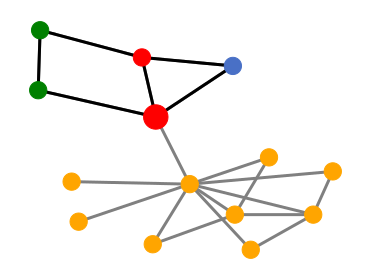

In [38]:
# --- Create data collector and explanation processor ---
from dig.xgraph.evaluation import XCollector

x_collector = XCollector()

index = -1
node_indices = torch.where(dataset[0].test_mask * dataset[0].y != 0)[0].tolist()
data = dataset[0]

from digg.xgraph.method.subgraphx import PlotUtils
from digg.xgraph.method.subgraphx import find_closest_node_result

# Visualization
max_nodes = 5
node_idx = node_indices[20]
print(f'explain graph node {node_idx}')
data.to(device)
logits = model(data.x, data.edge_index)
prediction = logits[node_idx].argmax(-1).item()

_, explanation_results, related_preds = explainer(data.x, data.edge_index, node_idx=node_idx, max_nodes=max_nodes)

explanation_results = explanation_results[prediction]
explanation_results = explainer.read_from_MCTSInfo_list(explanation_results)

plotutils = PlotUtils(dataset_name='ba_shapes', is_show=True)
explainer.visualization(explanation_results,
                        max_nodes=max_nodes,
                        plot_utils=plotutils,
                        y=data.y)
# explain graph node 515

In [22]:
dataset

MUTAG(188)

In [23]:
# --- Create data collector and explanation processor ---
from digg.xgraph.evaluation import XCollector

x_collector = XCollector()

index = -1
# node_indices = torch.where(dataset[0].test_mask * dataset[0].y != 0)[0].tolist()
data = dataset[0]

from digg.xgraph.method.subgraphx import PlotUtils
from digg.xgraph.method.subgraphx import find_closest_node_result

# Visualization
max_nodes = 5
# node_idx = node_indices[20]
node_idx = None
# print(f'explain graph node {node_idx}')
data.to(device)
logits = model(data.x, data.edge_index)
prediction = logits[node_idx].argmax(-1).item()

_, explanation_results, related_preds = explainer(data.x, data.edge_index, node_idx=node_idx, max_nodes=max_nodes)

explanation_results = explanation_results[prediction]
explanation_results = explainer.read_from_MCTSInfo_list(explanation_results)

plotutils = PlotUtils(dataset_name='MUTAG', is_show=True)
explainer.visualization(explanation_results,
                        max_nodes=max_nodes,
                        plot_utils=plotutils,
                        y=data.y)
# explain graph node 515

TypeError: Can't instantiate abstract class MarginalSubgraphDataset with abstract methods get, len

In [ ]:
!pip install captum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.8 MB/s eta 0:00:0000:0100:01


In [ ]:
import captum

ModuleNotFoundError: No module named 'captum'

In [ ]:
!pip uninstall captum --y

Found existing installation: captum 0.2.0
Uninstalling captum-0.2.0:
  Successfully uninstalled captum-0.2.0


In [ ]:
!pip install captum --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.7 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dive-into-graphs 1.1.0 requires captum==0.2.0, but you have captum 0.7.0 which is incompatible.


In [ ]:
# --- Create data collector and explanation processor ---
from digg.xgraph.evaluation import XCollector

x_collector = XCollector()

index = -1
node_indices = torch.where(dataset[0].test_mask * dataset[0].y != 0)[0].tolist()
data = dataset[0]

from digg.xgraph.method.subgraphx import PlotUtils
from digg.xgraph.method.subgraphx import find_closest_node_result

# Visualization
max_nodes = 5
node_idx = node_indices[20]
print(f'explain graph node {node_idx}')
data.to(device)
logits = model(data.x, data.edge_index)
prediction = logits[node_idx].argmax(-1).item()

_, explanation_results, related_preds =explainer(data.x, data.edge_index, node_idx=node_idx, max_nodes=max_nodes)

explanation_results = explanation_results[prediction]
explanation_results = explainer.read_from_MCTSInfo_list(explanation_results)

plotutils = PlotUtils(dataset_name='ba_shapes', is_show=True)
explainer.visualization(explanation_results,
                        max_nodes=max_nodes,
                        plot_utils=plotutils,
                        y=data.y)

In [ ]:
data

In [ ]:
import networkx as nx 

In [ ]:
import torch_geometric

In [ ]:
nx.draw(torch_geometric.utils.to_networkx(data),with_labels=True)

In [ ]:
node_indices

In [ ]:
data.edge_index

In [ ]:
data.edge_index[1][(data.edge_index[0] == 515).nonzero(as_tuple=False)]

In [ ]:
def check_checkpoints(root='./'):
    if osp.exists(osp.join(root, 'checkpoints')):
        return
    url = ('https://github.com/divelab/DIG_storage/raw/main/xgraph/checkpoints.zip')
    path = download_url(url, root)
    extract_zip(path, root)
    os.unlink(path)


model = GCN_2l(model_level='graph', dim_node=dim_node, dim_hidden=300, num_classes=num_classes)
model.to(device)
check_checkpoints()
ckpt_path = osp.join('checkpoints', 'mutag', 'GCN_2l', '0', 'GCN_2l_best.ckpt')
state_dict = compatible_state_dict(torch.load(ckpt_path, map_location='cpu')['state_dict'])
model.load_state_dict(state_dict)

In [ ]:
from digg.xgraph.method import SubgraphX

explainer = SubgraphX(model, num_classes=4, device=device,
                      explain_graph=True, reward_method='mc_l_shapley')

In [ ]:
node_indices

In [ ]:
# --- Create data collector and explanation processor ---
from digg.xgraph.evaluation import XCollector

x_collector = XCollector()

index = -1
node_indices = torch.where(dataset[0].test_mask * dataset[0].y != 0)[0].tolist()
data = dataset[0]

from digg.xgraph.method.subgraphx import PlotUtils
from digg.xgraph.method.subgraphx import find_closest_node_result

# Visualization
max_nodes = 5
# node_idx = node_indices[20]
node_idx=None
print(f'explain graph node {node_idx}')
data.to(device)
logits = model(data.x, data.edge_index)
prediction = logits[node_idx].argmax(-1).item()

_, explanation_results, related_preds =explainer(data.x, data.edge_index, node_idx=node_idx, max_nodes=max_nodes)

explanation_results = explanation_results[prediction]
explanation_results = explainer.read_from_MCTSInfo_list(explanation_results)

plotutils = PlotUtils(dataset_name='ba_shapes', is_show=True)
explainer.visualization(explanation_results,
                        max_nodes=max_nodes,
                        plot_utils=plotutils,
                        y=data.y)

### The metric result

In [ ]:
max_nodes = 5
for node_idx in node_indices:
    index += 1
    print(f'explain graph node {node_idx}')
    data.to(device)

    if torch.isnan(data.y[0].squeeze()):
        continue

    logits = model(data.x, data.edge_index)
    prediction = logits[node_idx].argmax(-1).item()

    _, explanation_results, related_preds = explainer(data.x, data.edge_index, node_idx=node_idx, max_nodes=max_nodes)

    explanation_results = explanation_results[prediction]
    explanation_results = explainer.read_from_MCTSInfo_list(explanation_results)
    result = find_closest_node_result(explanation_results, max_nodes=max_nodes)

    x_collector.collect_data(result.coalition, related_preds, label=prediction)
    if index >= 20:
        break

print(f'Fidelity: {x_collector.fidelity:.4f}\n',
      f'Infidelity: {x_collector.fidelity_inv:.4f}\n'
      f'Sparsity: {x_collector.sparsity:.4f}')